# Mammography Data Analysis and Visualization

This notebook analyzes and visualizes mammography data from the CBIS-DDSM dataset.

In [25]:
# Install necessary libraries
!pip install pandas matplotlib seaborn pillow opencv-python

DEPRECATION: Loading egg at c:\users\17r4\appdata\local\programs\python\python311\lib\site-packages\beautifulsoup4-4.12.2-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\17r4\appdata\local\programs\python\python311\lib\site-packages\cython_bbox-0.1.3-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\17r4\appdata\local\programs\python\python311\lib\site-packages\fire-0.5.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\17r4\appdata\local\programs\python\python311\lib\site-packages\paddleocr-2.7.0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for pack

In [26]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import cv2
from pathlib import Path

# Set plot style
plt.style.use('ggplot')
sns.set(style="whitegrid")
%matplotlib inline

## 1. Loading the Data

Let's load the CSV files containing the mammography data.

In [27]:
# Define paths to CSV files
meta_path = 'csv/meta.csv'
calc_train_path = 'csv/calc_case_description_train_set.csv'
mass_train_path = 'csv/mass_case_description_train_set.csv'
dicom_info_path = 'csv/dicom_info.csv'

# Load the data
try:
    meta_df = pd.read_csv(meta_path)
    print(f"Loaded meta.csv with {len(meta_df)} rows")
except FileNotFoundError:
    print(f"File not found: {meta_path}")
    meta_df = None

try:
    calc_train_df = pd.read_csv(calc_train_path)
    print(f"Loaded calc_case_description_train_set.csv with {len(calc_train_df)} rows")
except FileNotFoundError:
    print(f"File not found: {calc_train_path}")
    calc_train_df = None

try:
    mass_train_df = pd.read_csv(mass_train_path)
    print(f"Loaded mass_case_description_train_set.csv with {len(mass_train_df)} rows")
except FileNotFoundError:
    print(f"File not found: {mass_train_path}")
    mass_train_df = None

try:
    dicom_info_df = pd.read_csv(dicom_info_path)
    print(f"Loaded dicom_info.csv with {len(dicom_info_df)} rows")
except FileNotFoundError:
    print(f"File not found: {dicom_info_path}")
    dicom_info_df = None

Loaded meta.csv with 6775 rows
Loaded calc_case_description_train_set.csv with 1546 rows
Loaded mass_case_description_train_set.csv with 1318 rows
Loaded dicom_info.csv with 10237 rows


## 2. Data Exploration

Let's explore the structure of the datasets.

In [28]:
# Explore the calcification training dataset
if calc_train_df is not None:
    print("Calcification Training Dataset Columns:")
    print(calc_train_df.columns.tolist())
    print("\nSample data:")
    display(calc_train_df.head())
    
    # Check for missing values
    print("\nMissing values:")
    print(calc_train_df.isnull().sum())

Calcification Training Dataset Columns:
['patient_id', 'breast density', 'left or right breast', 'image view', 'abnormality id', 'abnormality type', 'calc type', 'calc distribution', 'assessment', 'pathology', 'subtlety', 'image file path', 'cropped image file path', 'ROI mask file path']

Sample data:


,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...



Missing values:
patient_id                   0
breast density               0
left or right breast         0
image view                   0
abnormality id               0
abnormality type             0
calc type                   20
calc distribution          376
assessment                   0
pathology                    0
subtlety                     0
image file path              0
cropped image file path      0
ROI mask file path           0
dtype: int64


In [29]:
# Explore the mass training dataset
if mass_train_df is not None:
    print("Mass Training Dataset Columns:")
    print(mass_train_df.columns.tolist())
    print("\nSample data:")
    display(mass_train_df.head())
    
    # Check for missing values
    print("\nMissing values:")
    print(mass_train_df.isnull().sum())

Mass Training Dataset Columns:
['patient_id', 'breast_density', 'left or right breast', 'image view', 'abnormality id', 'abnormality type', 'mass shape', 'mass margins', 'assessment', 'pathology', 'subtlety', 'image file path', 'cropped image file path', 'ROI mask file path']

Sample data:


,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....



Missing values:
patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  4
mass margins               43
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64


## 3. Data Visualization

Let's create visualizations to better understand the data.

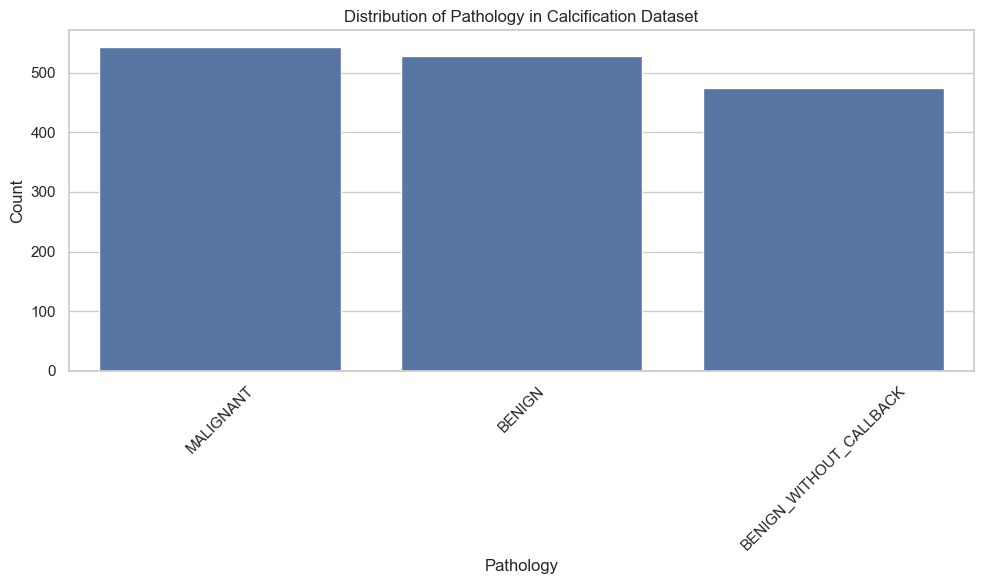

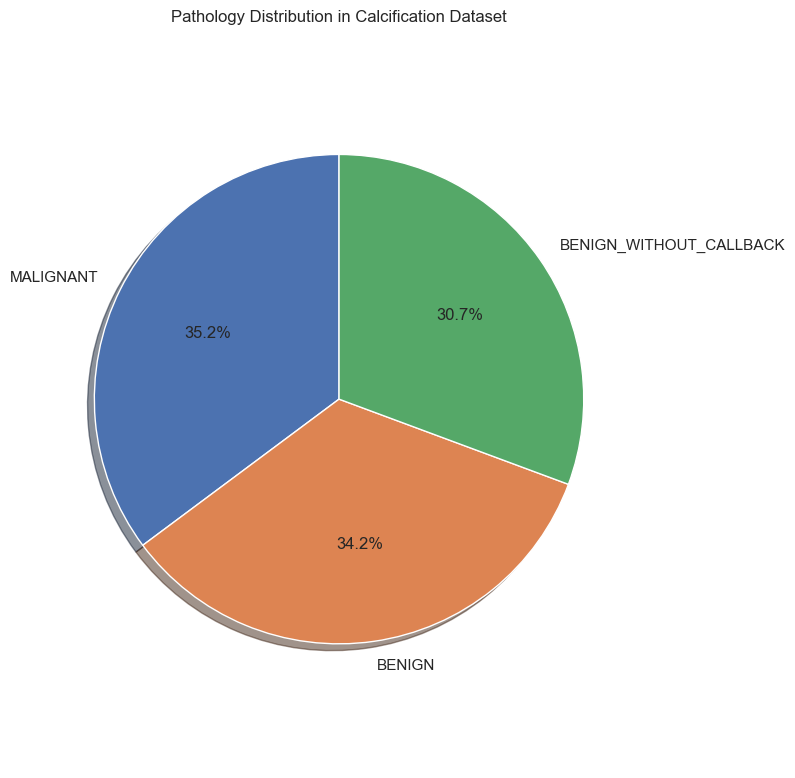

In [30]:
# Visualize pathology distribution in calcification dataset
if calc_train_df is not None:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='pathology', data=calc_train_df)
    plt.title('Distribution of Pathology in Calcification Dataset')
    plt.xlabel('Pathology')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Calculate percentages
    pathology_counts = calc_train_df['pathology'].value_counts()
    pathology_percentages = pathology_counts / len(calc_train_df) * 100
    
    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(pathology_percentages, labels=pathology_percentages.index, 
            autopct='%1.1f%%', startangle=90, shadow=True)
    plt.title('Pathology Distribution in Calcification Dataset')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.tight_layout()
    plt.show()

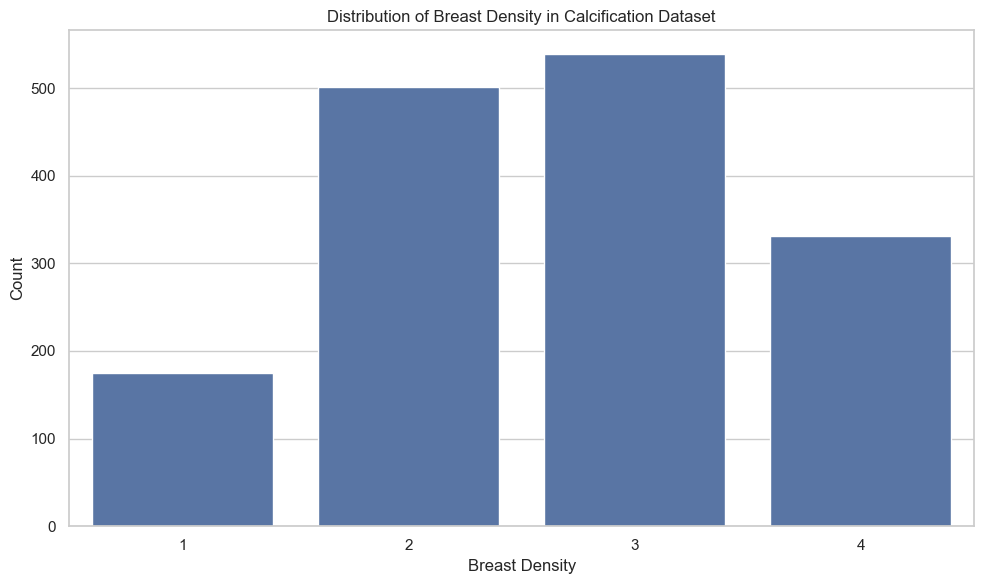

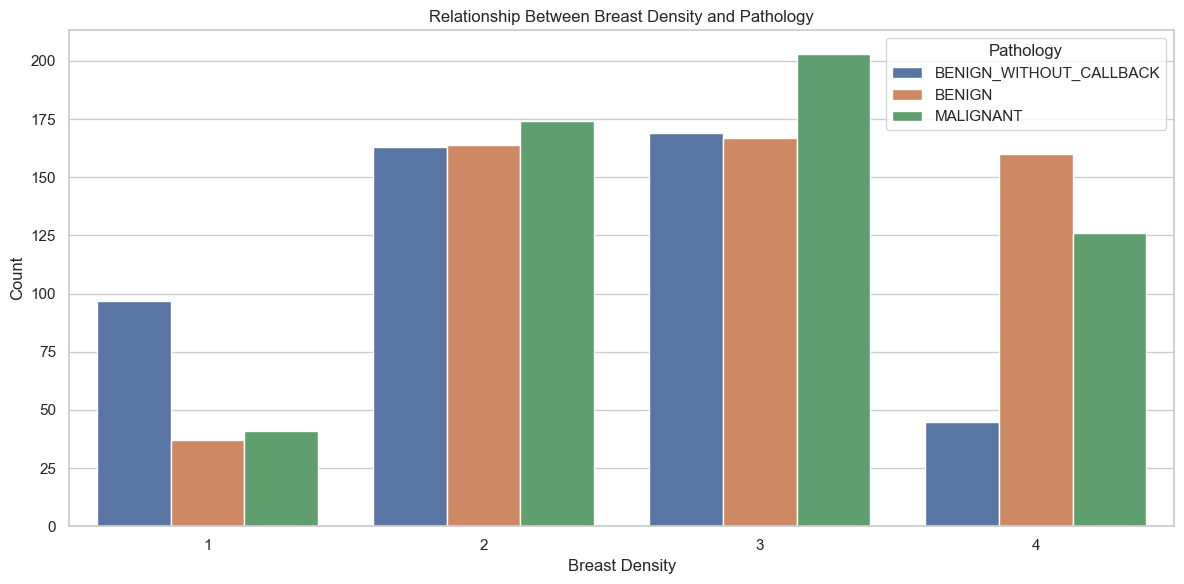

In [31]:
# Visualize breast density distribution
if calc_train_df is not None:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='breast density', data=calc_train_df)
    plt.title('Distribution of Breast Density in Calcification Dataset')
    plt.xlabel('Breast Density')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    
    # Relationship between breast density and pathology
    plt.figure(figsize=(12, 6))
    sns.countplot(x='breast density', hue='pathology', data=calc_train_df)
    plt.title('Relationship Between Breast Density and Pathology')
    plt.xlabel('Breast Density')
    plt.ylabel('Count')
    plt.legend(title='Pathology')
    plt.tight_layout()
    plt.show()

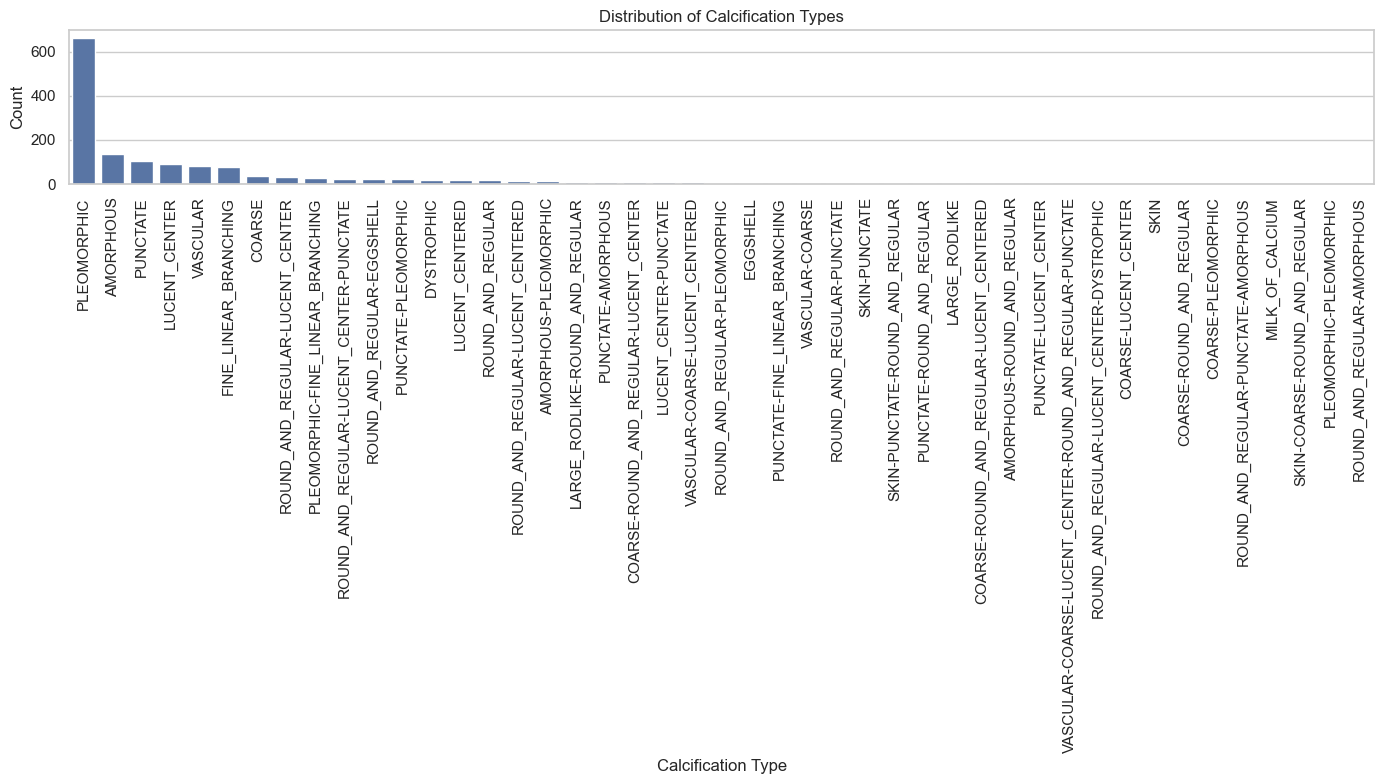

In [32]:
# Visualize calcification types
if calc_train_df is not None:
    plt.figure(figsize=(14, 8))
    calc_counts = calc_train_df['calc type'].value_counts()
    sns.barplot(x=calc_counts.index, y=calc_counts.values)
    plt.title('Distribution of Calcification Types')
    plt.xlabel('Calcification Type')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

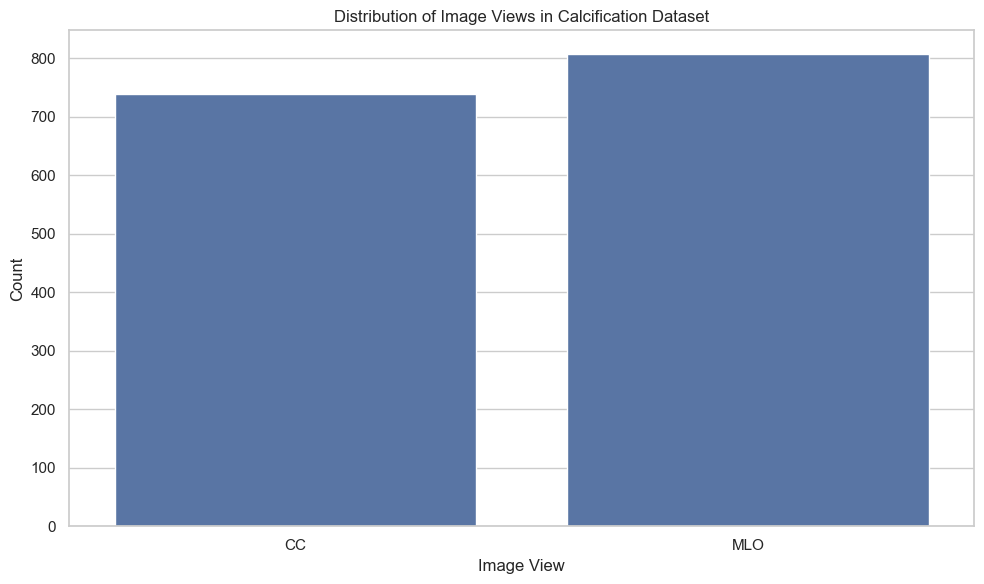

In [33]:
# Visualize image view distribution
if calc_train_df is not None:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='image view', data=calc_train_df)
    plt.title('Distribution of Image Views in Calcification Dataset')
    plt.xlabel('Image View')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

## 4. Image Visualization

Let's visualize some of the mammography images.

Displaying sample images from calcification dataset:


C:\Users\17R4\AppData\Local\Temp\ipykernel_286492\3338217232.py:48: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


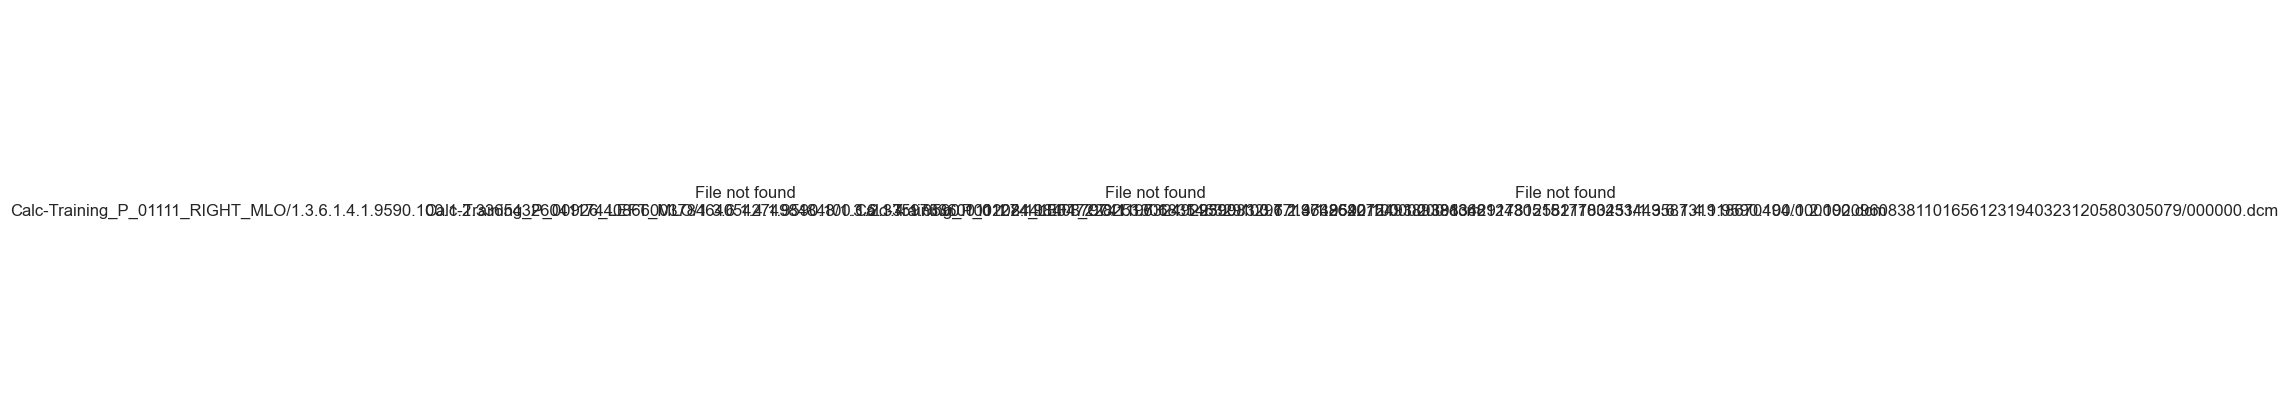

In [34]:
# Function to display mammography images
def display_mammography_images(df, num_images=3):
    if df is None or len(df) == 0:
        print("No data available for image display")
        return
    
    # Get a sample of image paths
    if 'image file path' in df.columns:
        image_paths = df['image file path'].sample(num_images).tolist()
    elif 'cropped image file path' in df.columns:
        image_paths = df['cropped image file path'].sample(num_images).tolist()
    else:
        print("No image path columns found in the dataset")
        return
    
    # Display the images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    if num_images == 1:
        axes = [axes]  # Make axes iterable if only one image
    
    for i, path in enumerate(image_paths):
        # Clean the path if needed (some paths have newlines or quotes)
        path = path.strip().strip('"')
        
        # Check if the file exists
        if os.path.exists(path):
            try:
                # Try to open the image
                img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    axes[i].imshow(img, cmap='gray')
                    axes[i].set_title(f"Image {i+1}")
                    axes[i].axis('off')
                else:
                    axes[i].text(0.5, 0.5, f"Could not load image\n{path}", 
                                 ha='center', va='center')
                    axes[i].axis('off')
            except Exception as e:
                axes[i].text(0.5, 0.5, f"Error: {str(e)}\n{path}", 
                             ha='center', va='center')
                axes[i].axis('off')
        else:
            # If file doesn't exist, display a message
            axes[i].text(0.5, 0.5, f"File not found\n{path}", 
                         ha='center', va='center')
            axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Try to display some images from the calcification dataset
if calc_train_df is not None:
    print("Displaying sample images from calcification dataset:")
    display_mammography_images(calc_train_df)

Displaying first image from calcification dataset (JPG version):
Original DICOM path: Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.408909860712120272633130274602115723157/1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548/000000.dcm
DICOM UID: 1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548
Found JPG path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548/1-188.jpg
Looking for JPG in directory: jpeg/1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548
Found JPG: jpeg/1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548\1-188.jpg


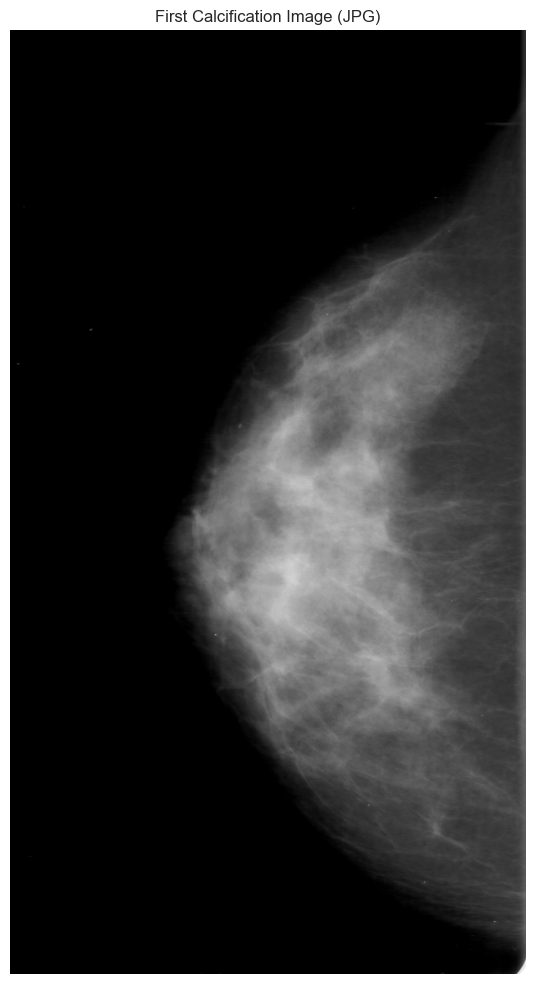

In [ ]:
# Display the first image from calc_train_df in the JPG folder
if calc_train_df is not None and dicom_info_df is not None:
    print("Displaying first image from calcification dataset (JPG version):")
    
    # Get the first image path from calc_train_df
    if 'image file path' in calc_train_df.columns:
        first_image_path = calc_train_df['image file path'].iloc[0]
        print(f"Original DICOM path: {first_image_path}")
        
        # Extract the DICOM UID from the path
        parts = first_image_path.split('/')
        if len(parts) >= 2:
            dicom_uid = parts[-2]  # Get the UID directory
            print(f"DICOM UID: {dicom_uid}")
            
            # Find the corresponding JPG path in dicom_info_df
            matching_rows = dicom_info_df[dicom_info_df['file_path'].str.contains(dicom_uid, na=False)]
            
            if not matching_rows.empty and 'image_path' in matching_rows.columns:
                jpg_path = matching_rows['image_path'].iloc[0]
                print(f"Found JPG path: {jpg_path}")
                
                # Display the JPG image
                plt.figure(figsize=(10, 10))
                if os.path.exists(jpg_path):
                    img = cv2.imread(jpg_path, cv2.IMREAD_GRAYSCALE)
                    if img is not None:
                        plt.imshow(img, cmap='gray')
                        plt.title("First Calcification Image (JPG)")
                        plt.axis('off')
                    else:
                        plt.text(0.5, 0.5, f"Could not load image\n{jpg_path}", 
                                ha='center', va='center')
                else:
                    # Try to find the JPG in the jpeg directory
                    jpg_dir = f"jpeg/{dicom_uid}"
                    print(f"Looking for JPG in directory: {jpg_dir}")
                    
                    if os.path.exists(jpg_dir):
                        jpg_files = [f for f in os.listdir(jpg_dir) if f.endswith('.jpg')]
                        if jpg_files:
                            jpg_path = os.path.join(jpg_dir, jpg_files[0])
                            print(f"Found JPG: {jpg_path}")
                            
                            img = cv2.imread(jpg_path, cv2.IMREAD_GRAYSCALE)
                            if img is not None:
                                plt.imshow(img, cmap='gray')
                                plt.title("First Calcification Image (JPG)")
                                plt.axis('off')
                            else:
                                plt.text(0.5, 0.5, f"Could not load image\n{jpg_path}", 
                                        ha='center', va='center')
                        else:
                            plt.text(0.5, 0.5, f"No JPG files found in\n{jpg_dir}", 
                                    ha='center', va='center')
                    else:
                        plt.text(0.5, 0.5, f"JPG directory not found\n{jpg_dir}", 
                                ha='center', va='center')
                
                plt.tight_layout()
                plt.show()
            else:
                print("Could not find matching JPG path in dicom_info_df")
                
                # Try to find the JPG in the jpeg directory
                jpg_dir = f"jpeg/{dicom_uid}"
                print(f"Looking for JPG in directory: {jpg_dir}")
                
                plt.figure(figsize=(10, 10))
                if os.path.exists(jpg_dir):
                    jpg_files = [f for f in os.listdir(jpg_dir) if f.endswith('.jpg')]
                    if jpg_files:
                        jpg_path = os.path.join(jpg_dir, jpg_files[0])
                        print(f"Found JPG: {jpg_path}")
                        
                        img = cv2.imread(jpg_path, cv2.IMREAD_GRAYSCALE)
                        if img is not None:
                            plt.imshow(img, cmap='gray')
                            plt.title("First Calcification Image (JPG)")
                            plt.axis('off')
                        else:
                            plt.text(0.5, 0.5, f"Could not load image\n{jpg_path}", 
                                    ha='center', va='center')
                    else:
                        plt.text(0.5, 0.5, f"No JPG files found in\n{jpg_dir}", 
                                ha='center', va='center')
                else:
                    plt.text(0.5, 0.5, f"JPG directory not found\n{jpg_dir}", 
                            ha='center', va='center')
                
                plt.tight_layout()
                plt.show()
        else:
            print("Could not parse DICOM path correctly")
    else:
        print("No 'image file path' column found in calc_train_df")
else:
    print("Either calc_train_df or dicom_info_df is not available")

The directory jpeg exists.
Number of subdirectories: 6774
First 5 subdirectories:
  1. 1.3.6.1.4.1.9590.100.1.2.100018879311824535125115145152454291132
    Contains 2 files
    First file: 1-263.jpg


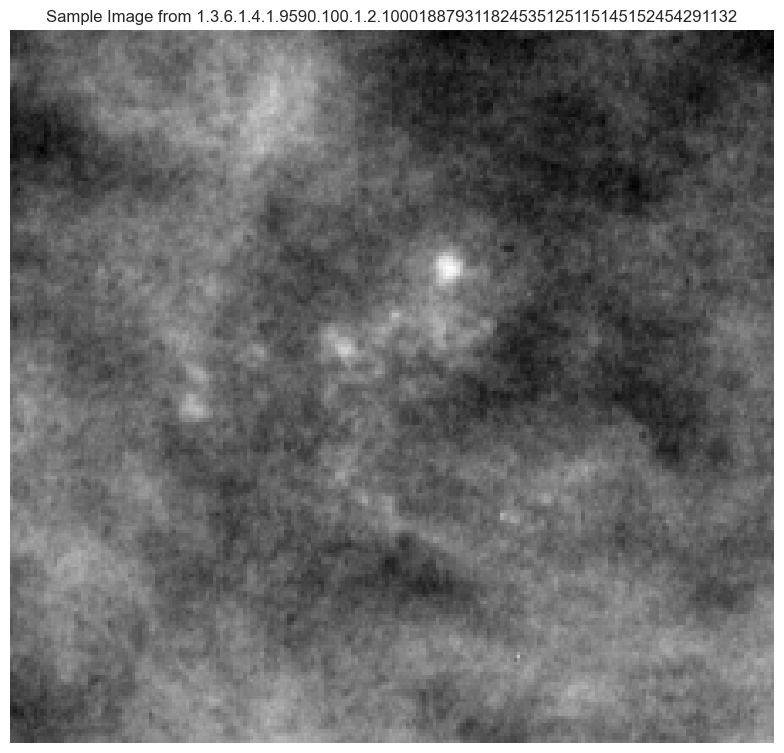

  2. 1.3.6.1.4.1.9590.100.1.2.100131208110604806117271735422083351547
    Contains 1 files
    First file: 1-126.jpg


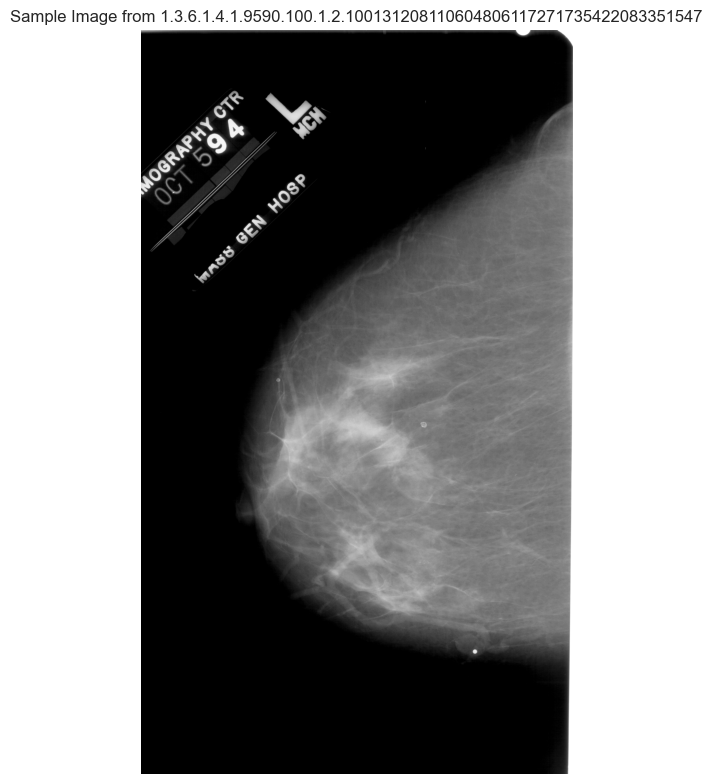

  3. 1.3.6.1.4.1.9590.100.1.2.100522099512256189513864912954167862869
    Contains 1 files
    First file: 1-231.jpg


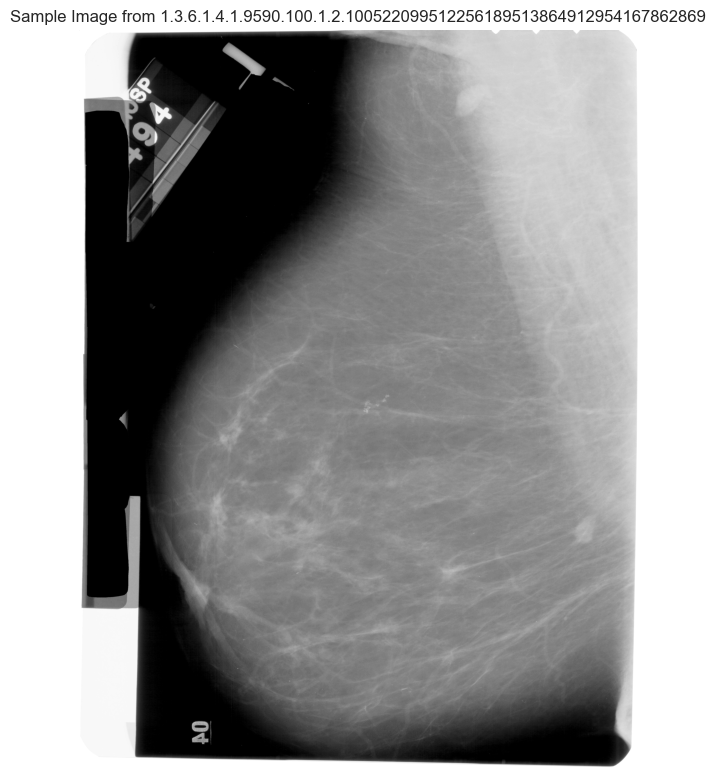

  4. 1.3.6.1.4.1.9590.100.1.2.100522676511025180541602449080267145647
    Contains 1 files
    First file: 1-111.jpg


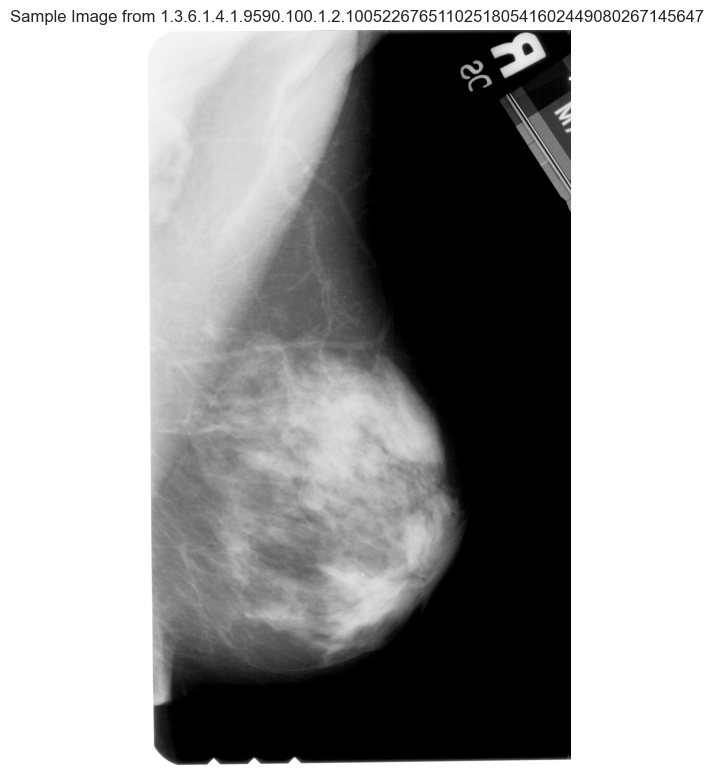

  5. 1.3.6.1.4.1.9590.100.1.2.10055294210766234140934516480682841962
    Contains 2 files
    First file: 1-031.jpg


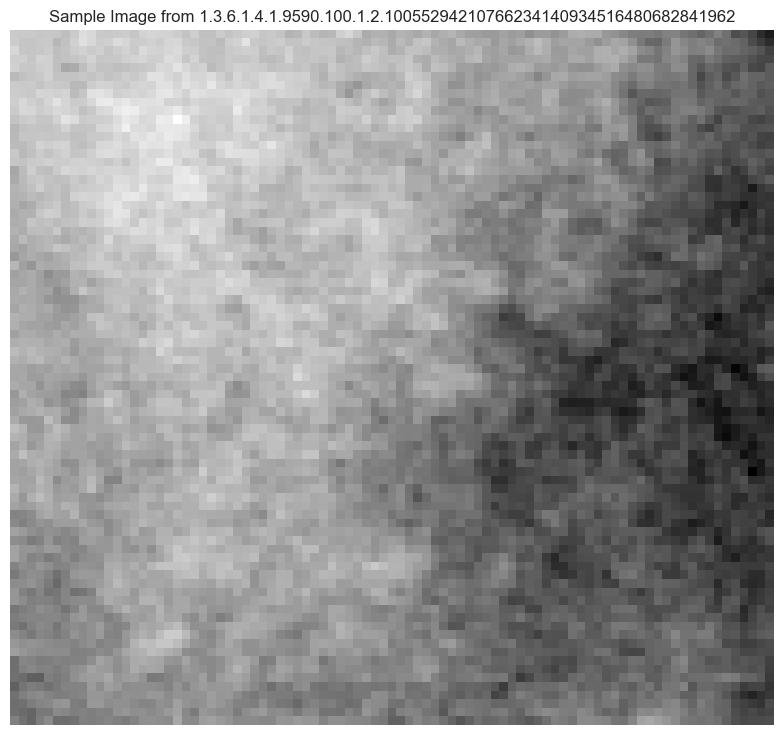

In [45]:
# Check if the jpeg directory exists and list its contents
jpeg_dir = "jpeg"
if os.path.exists(jpeg_dir):
    print(f"The directory {jpeg_dir} exists.")
    # List the first few subdirectories
    subdirs = [d for d in os.listdir(jpeg_dir) if os.path.isdir(os.path.join(jpeg_dir, d))]
    print(f"Number of subdirectories: {len(subdirs)}")
    if subdirs:
        print("First 5 subdirectories:")
        for i, d in enumerate(subdirs[:5]):
            print(f"  {i+1}. {d}")
            # List files in this subdirectory
            subdir_path = os.path.join(jpeg_dir, d)
            files = os.listdir(subdir_path)
            print(f"    Contains {len(files)} files")
            if files:
                print(f"    First file: {files[0]}")
                # Try to display the first image
                if files[0].endswith('.jpg'):
                    img_path = os.path.join(subdir_path, files[0])
                    plt.figure(figsize=(8, 8))
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    if img is not None:
                        plt.imshow(img, cmap='gray')
                        plt.title(f"Sample Image from {d}")
                        plt.axis('off')
                        plt.tight_layout()
                        plt.show()
else:
    print(f"The directory {jpeg_dir} does not exist.")
    
    # Check if we need to create the directory structure
    print("\nChecking for DICOM files to convert to JPEG...")
    dicom_dir = "dicom"
    if os.path.exists(dicom_dir):
        print(f"The directory {dicom_dir} exists. You could convert DICOM files to JPEG.")
    else:
        print(f"The directory {dicom_dir} does not exist either.")
        
        # Check if we have any DICOM files in the dataset
        if calc_train_df is not None and 'image file path' in calc_train_df.columns:
            print(str(calc_train_df['image file path'].iloc[0]))
            # Convert dicom files to jpeg using pydicom library
            print("\nConverting DICOM files to JPEG...")
            

            sample_path = calc_train_df['image file path'].iloc[0]
            print(f"Sample path from dataset: {sample_path}")
            if os.path.exists(sample_path):
                print("The sample DICOM file exists. You could create a script to convert DICOM to JPEG.")
            else:
                print("The sample DICOM file does not exist.")

In [ ]:
# Function to convert DICOM files to JPEG
def convert_dicom_to_jpg(dicom_path, output_dir, max_images=5):
    """
    Convert DICOM files to JPEG format.
    
    Parameters:
    -----------
    dicom_path : str
        Path to the DICOM file or directory containing DICOM files
    output_dir : str
        Directory where JPEG files will be saved
    max_images : int
        Maximum number of images to convert (for demonstration)
    """
    try:
        # Try to import pydicom (install if needed)
        import pydicom
    except ImportError:
        print("Installing pydicom...")
        !pip install pydicom
        import pydicom
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Function to process a single DICOM file
    def process_dicom_file(file_path, output_subdir):
        try:
            # Read the DICOM file
            dicom = pydicom.dcmread(file_path)
            
            # Create output subdirectory based on the DICOM UID
            uid_dir = os.path.basename(os.path.dirname(file_path))
            out_dir = os.path.join(output_subdir, uid_dir)
            os.makedirs(out_dir, exist_ok=True)
            
            # Convert to a format that can be saved as an image
            img_array = dicom.pixel_array
            
            # Normalize the pixel values to 0-255 (8-bit grayscale)
            img_array = img_array.astype(float)
            img_scaled = ((img_array - img_array.min()) / (img_array.max() - img_array.min())) * 255.0
            img_scaled = img_scaled.astype(np.uint8)
            
            # Save as JPEG
            output_file = os.path.join(out_dir, os.path.basename(file_path).replace('.dcm', '.jpg'))
            cv2.imwrite(output_file, img_scaled)
            print(f"Converted {file_path} to {output_file}")
            
            return output_file
        except Exception as e:
            print(f"Error processing {file_path}: {str(e)}")
            return None
    
    converted_files = []
    count = 0
    
    # Check if dicom_path is a file or directory
    if os.path.isfile(dicom_path) and dicom_path.endswith('.dcm'):
        # Process a single file
        output_file = process_dicom_file(dicom_path, output_dir)
        if output_file:
            converted_files.append(output_file)
    elif os.path.isdir(dicom_path):
        # Process all DICOM files in the directory
        for root, _, files in os.walk(dicom_path):
            for file in files:
                if file.endswith('.dcm') and count < max_images:
                    file_path = os.path.join(root, file)
                    output_file = process_dicom_file(file_path, output_dir)
                    if output_file:
                        converted_files.append(output_file)
                        count += 1
                if count >= max_images:
                    break
    else:
        print(f"Invalid path: {dicom_path}")
    
    return converted_files

# Example usage (commented out to avoid accidental execution)
'''
if calc_train_df is not None and 'image file path' in calc_train_df.columns:
    # Get a few sample DICOM paths
    sample_paths = calc_train_df['image file path'].iloc[:3].tolist()
    
    # Create output directory
    output_dir = "jpeg"
    
    # Convert DICOM files to JPEG
    for path in sample_paths:
        path = path.strip().strip('"')
        if os.path.exists(path):
            print(f"Converting {path} to JPEG...")
            converted_files = convert_dicom_to_jpg(path, output_dir)
            
            # Display the converted images
            for jpg_file in converted_files:
                plt.figure(figsize=(8, 8))
                img = cv2.imread(jpg_file, cv2.IMREAD_GRAYSCALE)
                plt.imshow(img, cmap='gray')
                plt.title(f"Converted Image: {os.path.basename(jpg_file)}")
                plt.axis('off')
                plt.tight_layout()
                plt.show()
        else:
            print(f"File not found: {path}")
'''

'\nif calc_train_df is not None and \'image file path\' in calc_train_df.columns:\n    # Get a few sample DICOM paths\n    sample_paths = calc_train_df[\'image file path\'].iloc[:3].tolist()\n\n    # Create output directory\n    output_dir = "CBIS-DDSM/jpeg"\n\n    # Convert DICOM files to JPEG\n    for path in sample_paths:\n        path = path.strip().strip(\'"\')\n        if os.path.exists(path):\n            print(f"Converting {path} to JPEG...")\n            converted_files = convert_dicom_to_jpg(path, output_dir)\n\n            # Display the converted images\n            for jpg_file in converted_files:\n                plt.figure(figsize=(8, 8))\n                img = cv2.imread(jpg_file, cv2.IMREAD_GRAYSCALE)\n                plt.imshow(img, cmap=\'gray\')\n                plt.title(f"Converted Image: {os.path.basename(jpg_file)}")\n                plt.axis(\'off\')\n                plt.tight_layout()\n                plt.show()\n        else:\n            print(f"File not foun

In [38]:
# Display the first image directly from the DICOM file
if calc_train_df is not None and 'image file path' in calc_train_df.columns:
    try:
        # Try to import pydicom (install if needed)
        import pydicom
    except ImportError:
        print("Installing pydicom...")
        !pip install pydicom
        import pydicom
    
    # Get the first image path
    first_image_path = calc_train_df['image file path'].iloc[0]
    first_image_path = first_image_path.strip().strip('"')
    print(f"First image path: {first_image_path}")
    
    if os.path.exists(first_image_path):
        try:
            # Read the DICOM file
            dicom = pydicom.dcmread(first_image_path)
            
            # Get the pixel array
            img_array = dicom.pixel_array
            
            # Display the image
            plt.figure(figsize=(10, 10))
            plt.imshow(img_array, cmap='gray')
            plt.title("First Calcification Image (DICOM)")
            plt.axis('off')
            plt.tight_layout()
            plt.show()
            
            # Display some DICOM metadata
            print("\nDICOM Metadata:")
            print(f"Patient ID: {dicom.PatientID if 'PatientID' in dicom else 'N/A'}")
            print(f"Modality: {dicom.Modality if 'Modality' in dicom else 'N/A'}")
            print(f"Image Size: {img_array.shape}")
            print(f"Bits Allocated: {dicom.BitsAllocated if 'BitsAllocated' in dicom else 'N/A'}")
            print(f"Pixel Spacing: {dicom.PixelSpacing if 'PixelSpacing' in dicom else 'N/A'}")
            
            # Try to get the first cropped image too
            if 'cropped image file path' in calc_train_df.columns:
                cropped_path = calc_train_df['cropped image file path'].iloc[0]
                cropped_path = cropped_path.strip().strip('"')
                print(f"\nCropped image path: {cropped_path}")
                
                if os.path.exists(cropped_path):
                    try:
                        # Read the cropped DICOM file
                        cropped_dicom = pydicom.dcmread(cropped_path)
                        cropped_img = cropped_dicom.pixel_array
                        
                        # Display the cropped image
                        plt.figure(figsize=(8, 8))
                        plt.imshow(cropped_img, cmap='gray')
                        plt.title("Cropped Calcification Image (DICOM)")
                        plt.axis('off')
                        plt.tight_layout()
                        plt.show()
                    except Exception as e:
                        print(f"Error reading cropped DICOM: {str(e)}")
                else:
                    print("Cropped image file not found.")
        except Exception as e:
            print(f"Error reading DICOM file: {str(e)}")
    else:
        print("First image file not found.")
else:
    print("Calcification dataset not available or missing 'image file path' column.")

Installing pydicom...
  Obtaining dependency information for pydicom from https://files.pythonhosted.org/packages/27/a6/98651e752a49f341aa99aa3f6c8ba361728dfc064242884355419df63669/pydicom-3.0.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
    --------------------------------------- 0.0/2.4 MB 330.3 kB/s eta 0:00:08
   - -------------------------------------- 0.1/2.4 MB 585.1 kB/s eta 0:00:04
   --- ------------------------------------ 0.2/2.4 MB 1.2 MB/s eta 0:00:02
   ------ --------------------------------- 0.4/2.4 MB 1.7 MB/s eta 0:00:02
   -------------- ------------------------- 0.8/2.4 MB 2.8 MB/s eta 0:00:01
   ------------------------ --------------- 1.5/2.4 MB 4.2 MB/s eta 0:00:01
   -------------------------------- ------- 2.0/2.4 MB 5.0 MB/s eta 0:00:01
   ---------------------------------

DEPRECATION: Loading egg at c:\users\17r4\appdata\local\programs\python\python311\lib\site-packages\beautifulsoup4-4.12.2-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\17r4\appdata\local\programs\python\python311\lib\site-packages\cython_bbox-0.1.3-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\17r4\appdata\local\programs\python\python311\lib\site-packages\fire-0.5.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\17r4\appdata\local\programs\python\python311\lib\site-packages\paddleocr-2.7.0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for pack

First image path: Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.408909860712120272633130274602115723157/1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548/000000.dcm
First image file not found.


## 5. DICOM Metadata Analysis

Let's analyze the DICOM metadata.

DICOM Metadata Sample:


,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


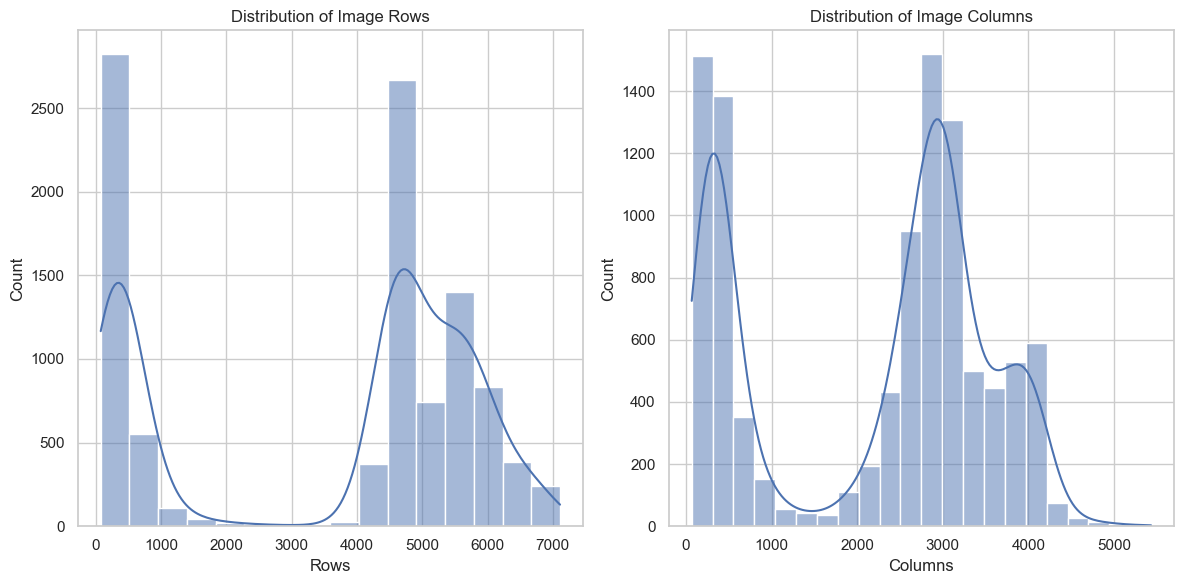

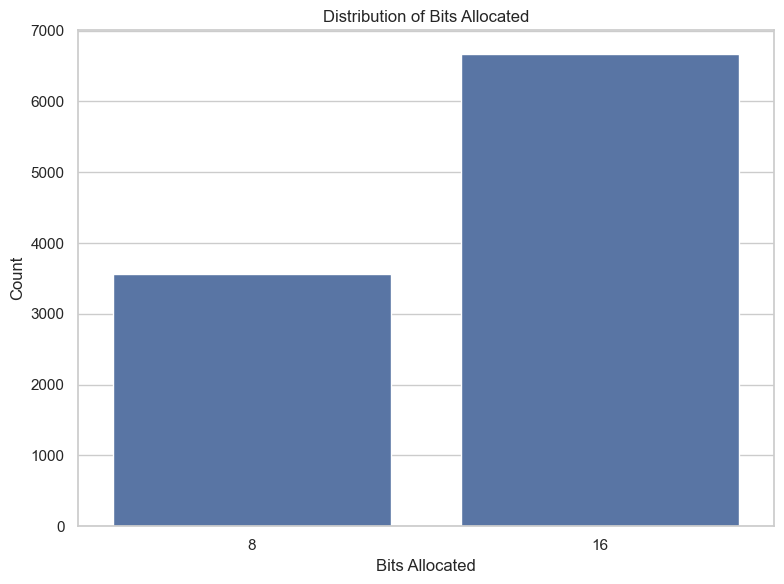

In [39]:
# Analyze DICOM metadata
if dicom_info_df is not None:
    # Display sample of DICOM metadata
    print("DICOM Metadata Sample:")
    display(dicom_info_df.head())
    
    # Analyze image dimensions
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(dicom_info_df['Rows'].dropna(), kde=True)
    plt.title('Distribution of Image Rows')
    plt.xlabel('Rows')
    
    plt.subplot(1, 2, 2)
    sns.histplot(dicom_info_df['Columns'].dropna(), kde=True)
    plt.title('Distribution of Image Columns')
    plt.xlabel('Columns')
    
    plt.tight_layout()
    plt.show()
    
    # Analyze bits allocated
    if 'BitsAllocated' in dicom_info_df.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x='BitsAllocated', data=dicom_info_df)
        plt.title('Distribution of Bits Allocated')
        plt.xlabel('Bits Allocated')
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

## 6. Conclusion

This notebook has provided visualizations and analysis of the mammography data from the CBIS-DDSM dataset. The analysis includes:

1. Distribution of pathology results
2. Breast density analysis
3. Calcification types
4. Image view distribution
5. Sample image visualization
6. DICOM metadata analysis

These visualizations help in understanding the dataset characteristics, which is essential for developing effective neural network models for mammography analysis.